<a href="https://colab.research.google.com/github/SirJoc/TP-Complejidad_Algoritmica/blob/develop/BackTracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import math
import heapq as hq
import graphviz as gv
!git clone https://github.com/lmcanavals/algorithmic_complexity.git
from algorithmic_complexity.aclib import graphstuff as gs

fatal: destination path 'algorithmic_complexity' already exists and is not an empty directory.


In [20]:
base = "https://raw.githubusercontent.com/lmcanavals/algorithmic_complexity/main/data/"
csv = "poblaciones.csv"
DATA_SET = pd.read_csv(f"{base}{csv}")

def calcularDistancia(cp1,cp2):
    la1, lo1 = float(cp1['LATITUD']), float(cp1['LONGITUD'])
    la2, lo2 = float(cp2['LATITUD']), float(cp2['LONGITUD'])
    
    lo1, la1, lo2, la2 = map(math.radians, [lo1, la1, lo2, la2])
    dlo = lo2 - lo1
    dla = la2 - la1
    a = math.sin(dla/2)**2 + math.cos(la1) * math.cos(la2) * math.sin(dlo/2)**2
    c = 2 * math.asin(math.sqrt(a))
    r = 6371

    return round(c * r, 2)

In [21]:
def nxAgv(G, weighted=False, params={'rankdir': 'LR', 'size': '6'},
          path=None, pathparams={'color':'orangered'}, nodeinfo=False):
  if G.is_directed():
    g = gv.Digraph('G')
  else:
    g = gv.Graph('G', strict=True)
  g.attr(**params)

  for u in G.nodes:
    if nodeinfo:
      g.node(str(u), **dict(G.nodes[u]))
    else:
      g.node(str(u))

 
    
  for u, v in G.edges():
    #print(v,path[v], path)
    pp = {} if path and path[v] == u else {}

    if weighted:
      g.edge(str(u), str(v), f"{G.edges[u, v]['weight']}", **pp)
    else:
      g.edge(str(u), str(v), **pp)
  for u in range(len(path)-1):
    v = u+1
    pp = pathparams
    g.edge(str(path[u]), str(path[v]), f"{G.edges[path[u], path[v]]['weight']}", **pp)       

  return g

In [22]:
def Area_Estudio(DATA_SET, Nom_Provinci, Nom_Distrito):

    list_Provincia = DATA_SET['PROVINCIA'].unique() #no repetir

    Provincia = dict()

    for i, nom1 in enumerate(list_Provincia):
        Provincia[nom1] = DATA_SET[DATA_SET['PROVINCIA'] == nom1]

    #---#

    list_Distrito = Provincia[Nom_Provinci]['DISTRITO'].unique()

    Distrito = dict()

    for j, nom2 in enumerate(list_Distrito):
        Distrito[nom2] = Provincia[Nom_Provinci][Provincia[Nom_Provinci]['DISTRITO'] == nom2]
    
    CentrosPoblados = Distrito[Nom_Distrito]
    #--#
    return CentrosPoblados

In [24]:
def Area_Estudio_Mayor(DATA_SET, Nom_Provinci):

    list_Provincia = DATA_SET['PROVINCIA'].unique() #no repetir

    Provincia = dict()

    for i, nom1 in enumerate(list_Provincia):
        Provincia[nom1] = DATA_SET[DATA_SET['PROVINCIA'] == nom1]

    #---#
 
    CentrosPoblados = Provincia[Nom_Provinci]
    #--#
    return CentrosPoblados

In [25]:
Zona = Area_Estudio(DATA_SET,'CHICLAYO', 'OYOTUN')
Zona2 = Area_Estudio_Mayor(DATA_SET,'UTCUBAMBA')
ZonaV3 = Area_Estudio(DATA_SET,'UTCUBAMBA', 'LONYA GRANDE')

In [29]:
def Gra(cp1, cp2, x):
  G = nx.Graph()
  indice = cp1.index[0] 
  for i, cp1 in x.iterrows():
    G.add_node(i-indice)

  for i, cp1 in x.iterrows():
    for j, cp2 in x.iterrows():
        if cp1['CENTRO POBLADO'] != cp2['CENTRO POBLADO']:     
            G.add_edge(i - indice, j - indice, weight =round(calcularDistancia(cp1, cp2), 2))
  
  return G

In [30]:
G = Gra(ZonaV3, ZonaV3, ZonaV3)

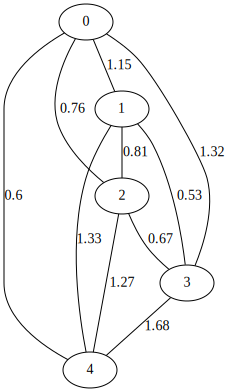

In [32]:
gs.nx2gv(G, weighted=True, params={'size':'15'}, nodeinfo=True)

#BackTracking

In [80]:
recorrido = []
for n in G.nodes:
    G.nodes[n]['visited'] = False
def algoritmo(G, aux, inicio, cont):    
  if(cont == len(G)):
    recorrido.append(inicio)
    return recorrido
  else:
    minimo = 99999999999    
    G.nodes[aux]['visited'] = True   
    recorrido.append(aux)
    for i in range(0, len(G)):            
      if G.nodes[aux] != G.nodes[i] and G.nodes[i]['visited'] == False:
        pdist = G.edges[aux, i]['weight']
        if pdist < minimo:
          minimo = pdist
          aux = i
    cont+=1     
    algoritmo(G, aux, inicio, cont)

[1, 0, 2, 3, 4, 1]


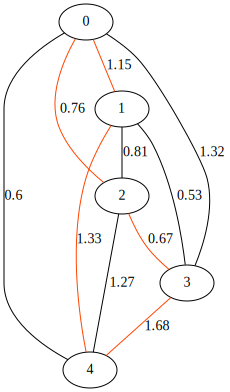

In [81]:
numero = random.randrange(0, len(G))
algoritmo(G, numero, numero, 0)
print(recorrido)
arr = recorrido
nxAgv(G, path=arr, weighted=True, params={'size':'15'})